In [2]:
import json
from model_api import eval_metric_model, yagpt_lite
from post_process import post_process_yagpt_lite
from tqdm import tqdm
import numpy as np
import time
import os
import utils

iam_token = 't1.9euelZqdx5CSm8jMj46ckMqWyYycxu3rnpWaz42dm4uLzouOlsfMypLLyZfl8_cNPw9U-e9-ZE1o_t3z901tDFT5735kTWj-zef1656VmpSaxpKZnM-eiozIkpGXmpXG7_zF656VmpSaxpKZnM-eiozIkpGXmpXG.iWyi4DG6jbihWsXSX-HKMVRtsYn_VlCqkZIuXr1oIAgh21ggc0Zx2sUho6OJqTtWj0AzYRiJHAcqIJPH6sAcAA'

In [3]:
with open('test_articles_clear_100.json', 'r') as fin:
    test_articles = [json.loads(s) for s in fin.readlines()]

## Compare Sum vs. Lite

In [25]:
results_sum = utils.load_jsonl_with_indent('test_results_yagpt_summarization.json')
results_lite = utils.load_jsonl('test_results_yagpt_lite_2.json')

In [26]:
scores_sum = [r['eval_scores'][0] for r in results_sum]
scores_lite = [r['eval_scores_2'][0] for r in results_lite]
print(f"Summarization model: mean={np.mean(scores_sum):.4f}, median={np.median(scores_sum):.4f}")
print(f"Lite model: mean={np.mean(scores_lite):.4f}, median={np.median(scores_lite):.4f}")

Summarization model: mean=0.5633, median=0.5957
Lite model: mean=0.5454, median=0.5559


In [27]:
# make paired t-test
from scipy import stats
stats.ttest_rel(scores_sum, scores_lite)

Ttest_relResult(statistic=1.6692383650585936, pvalue=0.09822956491702045)

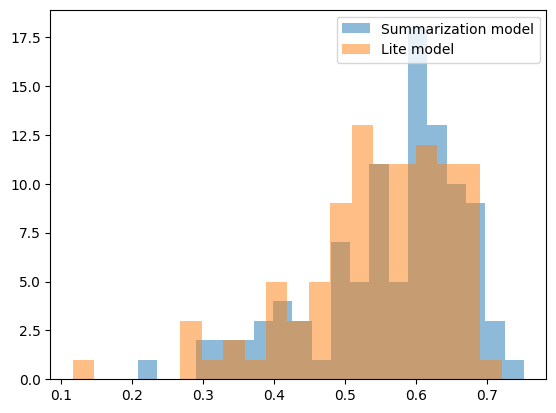

In [28]:
# plot hists
import matplotlib.pyplot as plt
plt.hist(scores_sum, bins=20, alpha=0.5, label='Summarization model')
plt.hist(scores_lite, bins=20, alpha=0.5, label='Lite model')
plt.legend(loc='upper right')

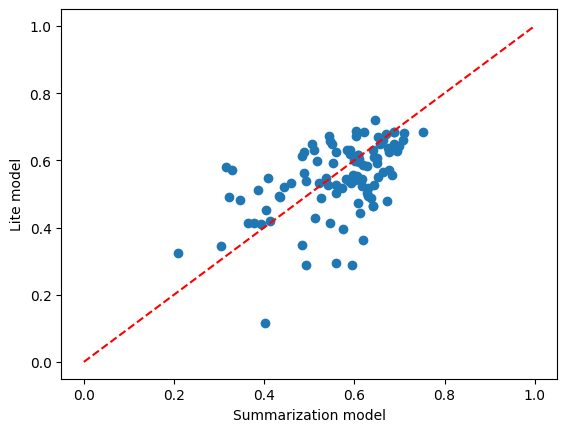

In [29]:
# plot scatter per-sample
plt.scatter(scores_sum, scores_lite)
plt.xlabel('Summarization model')
plt.ylabel('Lite model')
# line y=x
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

In [58]:
# ensembling results
results_ensembled = []
for i, (r_sum, r_lite) in enumerate(zip(results_sum, results_lite)):
    # add to ensembled results the result with higher score
    score_sum = r_sum['eval_scores'][0]
    score_lite = r_lite['eval_scores_2'][0]

    assert r_sum['id'] == r_lite['id']
    assert r_sum['idx'] == r_lite['idx']
    assert r_sum['id'] == test_articles[i]['id']

    if score_sum > score_lite:
        score = score_sum
        summary = r_sum['summaries'][0]
    else:
        score = score_lite
        summary = r_lite['summaries_cleaned_2'][0]
        
    result = {
        'idx': r_sum['idx'],
        'id': r_sum['id'],
        'summary': summary,
        'eval_score': score,
    }
    results_ensembled.append(result)

In [59]:
# get eval scores stats
scores_ensembled = [r['eval_score'] for r in results_ensembled]
print(f"Summarization model: mean={np.mean(scores_sum):.4f}, median={np.median(scores_sum):.4f}")
print(f"Lite model: mean={np.mean(scores_lite):.4f}, median={np.median(scores_lite):.4f}")
print(f"Ensembled model: mean={np.mean(scores_ensembled):.4f}, median={np.median(scores_ensembled):.4f}")

Summarization model: mean=0.5633, median=0.5957
Lite model: mean=0.5454, median=0.5559
Ensembled model: mean=0.5964, median=0.6165


In [11]:
# make t-test
from scipy import stats
stats.ttest_rel(scores_sum, scores_ensembled)

Ttest_relResult(statistic=-6.02518173881126, pvalue=2.8968491230274916e-08)

In [45]:
# get worst samples by score
results_ensembled_worst = sorted(results_ensembled, key=lambda r: r['eval_score'])[:10]
results_ensembled_worst

[{'idx': 83,
  'id': 91,
  'summary': 'Испанцы выбрасывают рабочие фотоаппараты, несмотря на то, что они могут быть проданы или отданы другим людям. Некоторые фотоаппараты, такие как Nikon F65 и Nikon Coolpix P510, остаются популярными среди фотографов-влогеров. Nikon Coolpix P600 - более новая модель, которая имеет поворотный экран, WiFi и возможность ручной фокусировки. Испанцы могут продавать свои фотоаппараты на онлайн-барахолках или на местных рынках. Испанцы могут также использовать свои фотоаппараты для съемки фотографий и видео, а также для записи геотегов. Испанцы могут отремонтировать свои фотоаппараты, если они имеют необходимые инструменты и знания. Испанцы могут продать свои фотоаппараты на запчасти или использовать их для других целей.',
  'eval_score': 0.323486},
 {'idx': 64,
  'id': 71,
  'summary': 'Обратный прокси (reverse proxy) — это тип прокси-сервера, который получает запрос от клиента, перенаправляет его на один или несколько серверов и пересылает ответ обратно. 

In [46]:
# get text of worst sample
idx = 10
print(test_articles[idx]['Text'])

Разработка монолитной Unix подобной OS — Системный журнал ядра (3) / Habr                       

09-09-2019
В предыдущей второй по счету статье мы с вами разработали необходимые функции для работы со строками из библиотеки С. В этом уроке мы реализуем полноценный отладочный вывод на экран — системный журнал ядра. Оглавление Система сборки (make, gcc, gas). Первоначальная загрузка (multiboot). Запуск (qemu). Библиотека C (strcpy, memcpy, strext). Библиотека C (sprintf, strcpy, strcmp, strtok, va_list ...). Сборка библиотеки в режиме ядра и в режиме пользовательского приложения. Системный журнал ядра. Видеопамять. Вывод на терминал (kprintf, kpanic, kassert). Динамическая память, куча (kmalloc, kfree). Организация памяти и обработка прерываний (GDT, IDT, PIC, syscall). Исключения. Виртуальная память (каталог страниц и таблица страниц). Процесс. Планировщик. Многозадачность. Системные вызовы (kill, exit, ps). Файловая система ядра (initrd), elf и его внутренности. Системные вызовы (exec)

In [19]:
from model_api import yagpt_summarization
from post_process import post_process_yagpt_summarization

s = yagpt_summarization(test_articles[idx]['Text'], iam_token, .01)
s = post_process_yagpt_summarization(s)
eval_score = eval_metric_model(test_articles[idx]['Text'], s)
print(s)
print(eval_score)

В статье рассматривается разработка монолитной Unix-подобной OS. Реализуется отладочный вывод на экран - системный журнал ядра. Используются функции для работы с портами ввода-вывода, прерываниями, видеопамятью и буферами. Вводятся функции для отладки ядра, такие как kpanic, kassert и kunreachable. Функции для работы с системным журналом ядра, включая kmode и klog. Вводятся функции для управления видеобуфером и прокруткой экрана. Используются ассемблерные функции для работы с портами ввода-вывода и прерываниями. Реализуется отладочный вывод на экран через видеопамять и буфер.
0.459717


In [51]:
# regenerate on worst samples
import time
from model_api import yagpt_summarization
from post_process import post_process_yagpt_summarization

results_new = []
for i, r in enumerate(tqdm(results_ensembled_worst)):
    # find test_article by id
    test_sample = [a for a in test_articles if a['id'] == r['id']][0]
    text = test_sample['Text']
    try:
        s = yagpt_summarization(text, iam_token, .01)
        s = post_process_yagpt_summarization(s)
        eval_score = eval_metric_model(text, s)
        time.sleep(5)
    except AssertionError:
        time.sleep(60)
        s = yagpt_summarization(text, iam_token, .01)
        s = post_process_yagpt_summarization(s)
        eval_score = eval_metric_model(text, s)
        time.sleep(5)
    result_new = {
        'idx': r['idx'],
        'id': r['id'],
        'summary': s,
        'eval_score': eval_score,
    }
    results_new.append(result_new)
    # compare scores
    print(f"Old score: {r['eval_score']:.4f}, new score: {eval_score:.4f}")

 10%|█         | 1/10 [00:07<01:08,  7.56s/it]

Old score: 0.3235, new score: 0.2295


 20%|██        | 2/10 [00:19<01:19,  9.98s/it]

Old score: 0.3440, new score: 0.5088


 30%|███       | 3/10 [00:30<01:13, 10.46s/it]

Old score: 0.4011, new score: 0.4597


 40%|████      | 4/10 [01:38<03:19, 33.30s/it]

Old score: 0.4106, new score: 0.6240


 50%|█████     | 5/10 [01:48<02:04, 24.97s/it]

Old score: 0.4126, new score: 0.2632


 60%|██████    | 6/10 [01:59<01:20, 20.25s/it]

Old score: 0.4138, new score: 0.4243


 70%|███████   | 7/10 [02:07<00:48, 16.12s/it]

Old score: 0.4207, new score: 0.4429


 80%|████████  | 8/10 [02:25<00:33, 16.65s/it]

Old score: 0.4526, new score: 0.4900


 90%|█████████ | 9/10 [03:35<00:33, 33.56s/it]

Old score: 0.4807, new score: 0.2625


100%|██████████| 10/10 [03:43<00:00, 22.39s/it]

Old score: 0.4849, new score: 0.3306


In [52]:
results_new

[{'idx': 83,
  'id': 91,
  'summary': 'Автор переехал в другой регион Испании и не нашел стоящей барахолки. Переключился на онлайн-покупки для собственных нужд и развития скилла. Купил четыре фотоаппарата за 40 евро, все у одного продавца. Первый фотоаппарат - Panasonic DMC-LS2, полностью рабочая камера.',
  'eval_score': 0.229492},
 {'idx': 64,
  'id': 71,
  'summary': 'Статья посвящена созданию обратного прокси на языке Go для Grafana. Обратный прокси - это тип прокси-сервера, который перенаправляет запросы на один или несколько серверов и пересылает ответы обратно. Обратный прокси может быть использован для балансировки нагрузки, A/B-тестирования, кэширования ресурсов, сжатия данных запроса, фильтрации трафика и авторизации. В статье рассматривается использование обратного прокси для авторизации в панели управления виртуализацией VMmanager 6. Основная идея - переложить ответственность за авторизацию в Grafana на сервер обратного прокси. Grafana будет принимать любой запрос как автор

In [54]:
# add new results to ensembled results if score is better
results_ensembled_2 = []
for r_old, r_new in zip(results_ensembled_worst, results_new):
    assert r_old.keys() == r_new.keys()
    assert r_old['id'] == r_new['id']
    if r_new['eval_score'] > r_old['eval_score']:
        results_ensembled_2.append(r_new)
    else:
        results_ensembled_2.append(r_old)

In [55]:
# change results in results_ensembled by "id"
for r_new in results_ensembled_2:
    for r in results_ensembled:
        if r['id'] == r_new['id']:
            assert r.keys() == r_new.keys()
            print(f"Old score: {r['eval_score']:.4f}, new score: {r_new['eval_score']:.4f}")
            r['summary'] = r_new['summary']
            r['eval_score'] = r_new['eval_score']

Old score: 0.3235, new score: 0.3235
Old score: 0.3440, new score: 0.5088
Old score: 0.4011, new score: 0.4597
Old score: 0.4106, new score: 0.6240
Old score: 0.4126, new score: 0.4126
Old score: 0.4138, new score: 0.4243
Old score: 0.4207, new score: 0.4429
Old score: 0.4526, new score: 0.4900
Old score: 0.4807, new score: 0.4807
Old score: 0.4849, new score: 0.4849


In [56]:
r_new['id']

84

In [57]:
results_ensembled_corrected = results_ensembled

In [60]:
# get eval scores stats
scores_ensembled_corrected = [r['eval_score'] for r in results_ensembled_corrected]
print(f"Summarization model: mean={np.mean(scores_sum):.4f}, median={np.median(scores_sum):.4f}")
print(f"Lite model: mean={np.mean(scores_lite):.4f}, median={np.median(scores_lite):.4f}")
print(f"Ensembled model: mean={np.mean(scores_ensembled):.4f}, median={np.median(scores_ensembled):.4f}")
print(f"Ensembled model corrected: mean={np.mean(scores_ensembled_corrected):.4f}, median={np.median(scores_ensembled_corrected):.4f}")

Summarization model: mean=0.5633, median=0.5957
Lite model: mean=0.5454, median=0.5559
Ensembled model: mean=0.5964, median=0.6165
Ensembled model corrected: mean=0.6014, median=0.6169


In [62]:
# make t-test
from scipy import stats
stats.ttest_rel(scores_ensembled, scores_ensembled_corrected)

Ttest_relResult(statistic=-1.8346952492517246, pvalue=0.0695538863022738)

In [20]:
chat_gpt_summary = '''Эта статья представляет собой учебный материал по созданию системного журнала ядра операционной системы. Автор описывает процесс разработки необходимых функций для работы со строками из библиотеки C и детально рассматривает систему сборки, включая инструменты make, gcc, gas. Он углубляется в темы, такие как первоначальная загрузка с использованием multiboot, запуск через qemu и различные функции библиотеки C (например, strcpy, memcpy, sprintf). Особое внимание уделяется системному журналу ядра, включая работу с видеопамятью и терминальным выводом (через функции kprintf, kpanic, kassert).
Автор объясняет организацию и управление памятью, включая динамическую память и обработку прерываний, а также вводит концепции виртуальной памяти, процессов, планировщика и многозадачности. Он также касается системных вызовов и файловой системы ядра.
Важной частью статьи является описание работы с портами ввода-вывода и управлением маскируемыми прерываниями процессора. Автор предлагает ассемблерные функции для этих задач и обсуждает управление системным журналом ядра.
В конце статьи автор представляет подробный туториал и предоставляет ссылки на видеоурок и исходный код, а также список литературы для дополнительного изучения.'''

eval_score_chat_gpt = eval_metric_model(test_articles[idx]['Text'], chat_gpt_summary)
eval_score_chat_gpt

0.524902

## Submit

In [63]:
# extract only id and summary
results_ensembled_submit = [{'id': r['id'], 'summary': r['summary']} for r in results_ensembled_corrected]
print(len(results_ensembled_submit))
results_ensembled_submit[0]

100


{'id': 1,
 'summary': 'Центр молодежного инновационного творчества «LAB3DPrint» представляет собой площадку для обучения взрослых и детей цифровому производству, 3D-моделированию, конструированию. В конце прошлого года компания «Raise3D» начала поставки 3D-принтеров Raise3D в Россию, подписав эксклюзивный контракт с этим производителем. Иван Мошкин, создатель и руководитель Лаборатории трёхмерной печати, обсудил с компанией «Raise3D» впечатления о модели N2 Plus Dual. Принтер находится у вас в эксплуатации примерно 1,5 месяца, оправдал ли он ваши ожидания? Для каких целей вы используете Raise3D N2 Plus Dual? Иван, расскажите об основных направлениях деятельности вашего ЦМИТа? Команда компании Цветной Мир По традиции минутка рекламы )'}

In [64]:
# save results_ensembled
with open('test_results_submit_ensembling_corrected.json', 'w') as fout:
    fout.write("\n".join([
        json.dumps(row, ensure_ascii=False)
        for row in results_ensembled_submit
    ]))

In [65]:
# check that all ids contain in test_articles
ids_test = set([r['id'] for r in test_articles])
ids_res = set([r['id'] for r in results_ensembled_submit])
assert ids_test == ids_res